# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go



# Viz mantra

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
# Model & split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import pickle
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../website.csv')
pd.set_option('display.max_columns', None)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
websites.shape

(1781, 21)

In [5]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [7]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [8]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [9]:
websites.duplicated().sum()

0

In [11]:
# I assume that the column "Type" is the target (the feauture that I will have to predict, the categorical variable).
# I suspect that '0' refers to the benign websites and '1' to the malicious ones.
# To confirm that, I check the value counts for each category 
# (There should be more good websites than bad ones, right?)

websites.Type.value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [12]:
# I create a subset with only the columns 'Type' and 'URL_LENGHT' without their null values, to check if the malicious websites usually haver longer urls than benign ones.
# Then I make a groupby by 'Type' and I calculate the mean of the url length for these two categories ('0' or '1').

filtered_websites = websites.loc[websites['Type'].notna() & websites['URL_LENGTH'].notna(), ['Type', 'URL_LENGTH']]
filt = filtered_websites.groupby('Type').agg({'URL_LENGTH': 'mean'})
filt

# I can see that the average of url length for malicious websites is higher. 

,URL_LENGTH
Type,
0,55.302236
1,68.981481


In [13]:
# There are also more special characters in the urls of malicious websites. 

filter_websites = websites.loc[websites['Type'].notna() & websites['URL_LENGTH'].notna() & websites['NUMBER_SPECIAL_CHARACTERS'].notna(), ['Type', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS']]
filthy = filter_websites.groupby('Type').agg({'URL_LENGTH': 'mean', 'NUMBER_SPECIAL_CHARACTERS': 'mean'})
filthy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS
Type,,
0,55.302236,10.637061
1,68.981481,14.550926


In [14]:
# I won't consider the columns that have string values (object types) for the correlation matrix.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [15]:
websites.head(1)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1


In [4]:
correlation = websites.corr(numeric_only=True)
correlation.head(2)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897


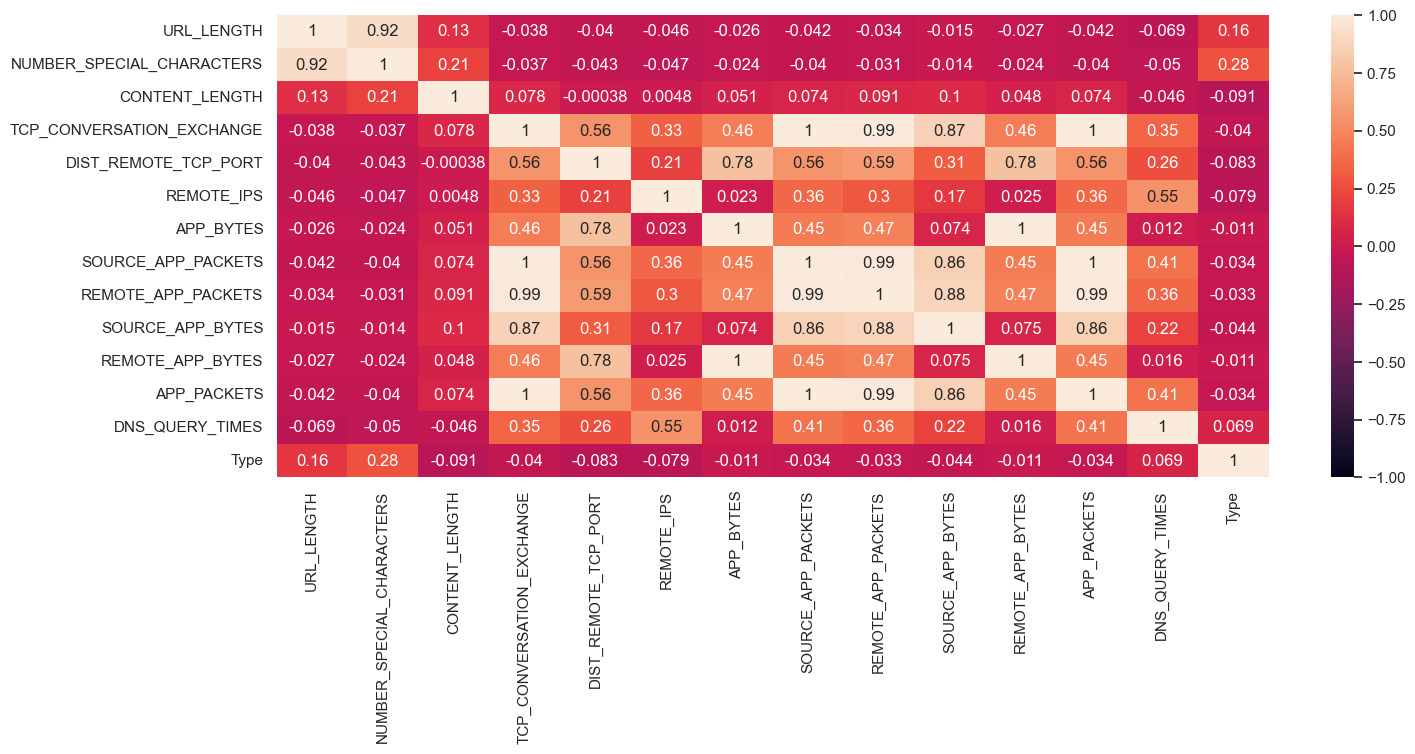

In [5]:
plt.figure(figsize=(16, 6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True);

In [18]:
# Columns with high collinearity: 
    # URL_LENGTH with CONTENT_LENGTH
    # TCP_CONVERSATION_EXCHANGE with SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, APP_PACKETS and also possibly with SOURCE_APP_BYTES
    # APP_BYTES shows collinearity with REMOTE_APP_BYTES
    # SOURCE_APP_PACKETS shows collinearity with APP_PACKETS and REMOTE_APP_PACKETS

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [19]:
websites.sample(1)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
940,B0_267,51,11,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,22/02/2001 0:00,8/04/2017 0:00,22,6,8,1651,24,17,1388,1787,24,2.0,0


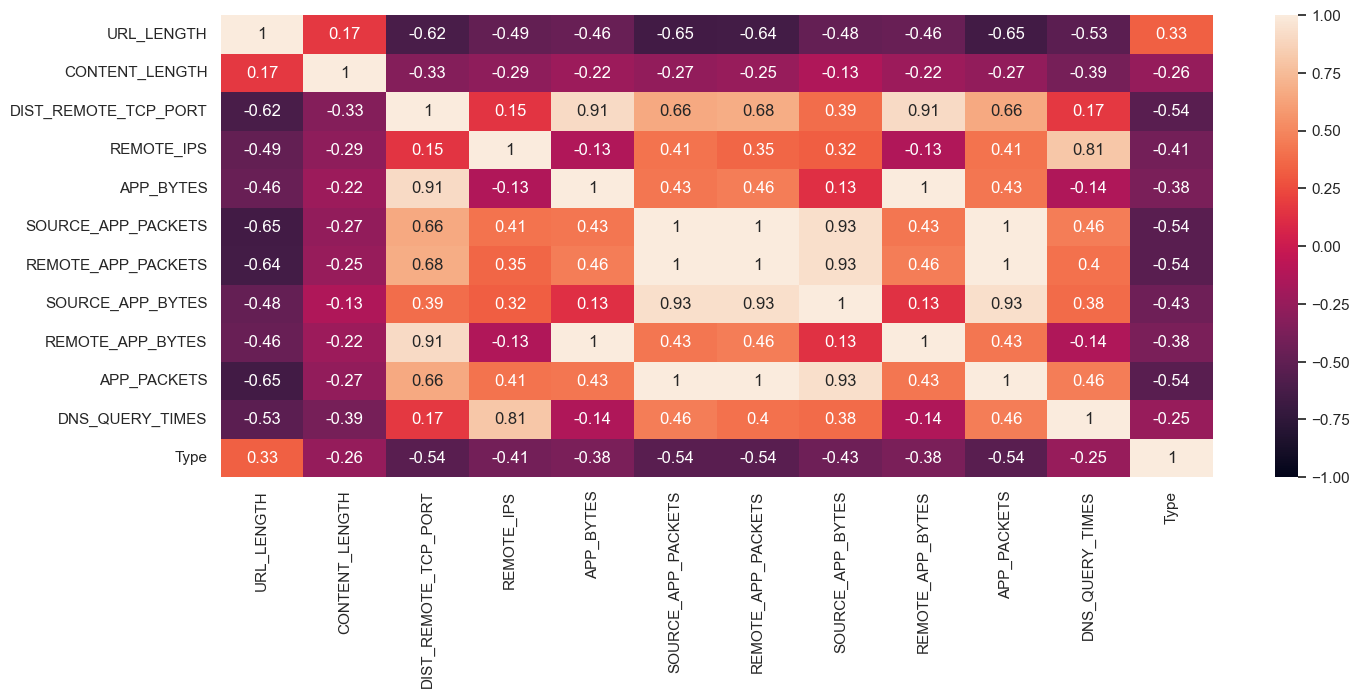

In [6]:
# I will drop the column of NUMBER_SPECIAL_CHARACTERS, because in the previous heatmap it shows quite collinearity with the URL_LENGTH.
# I'll also drop the column of TCP_CONVERSATION_EXCHANGE, because it had correlations with several columns. 

plt.figure(figsize=(16, 6))
sns.heatmap(correlation.drop(columns=["NUMBER_SPECIAL_CHARACTERS", "TCP_CONVERSATION_EXCHANGE"]).corr(), vmin=-1, vmax=1, annot=True);

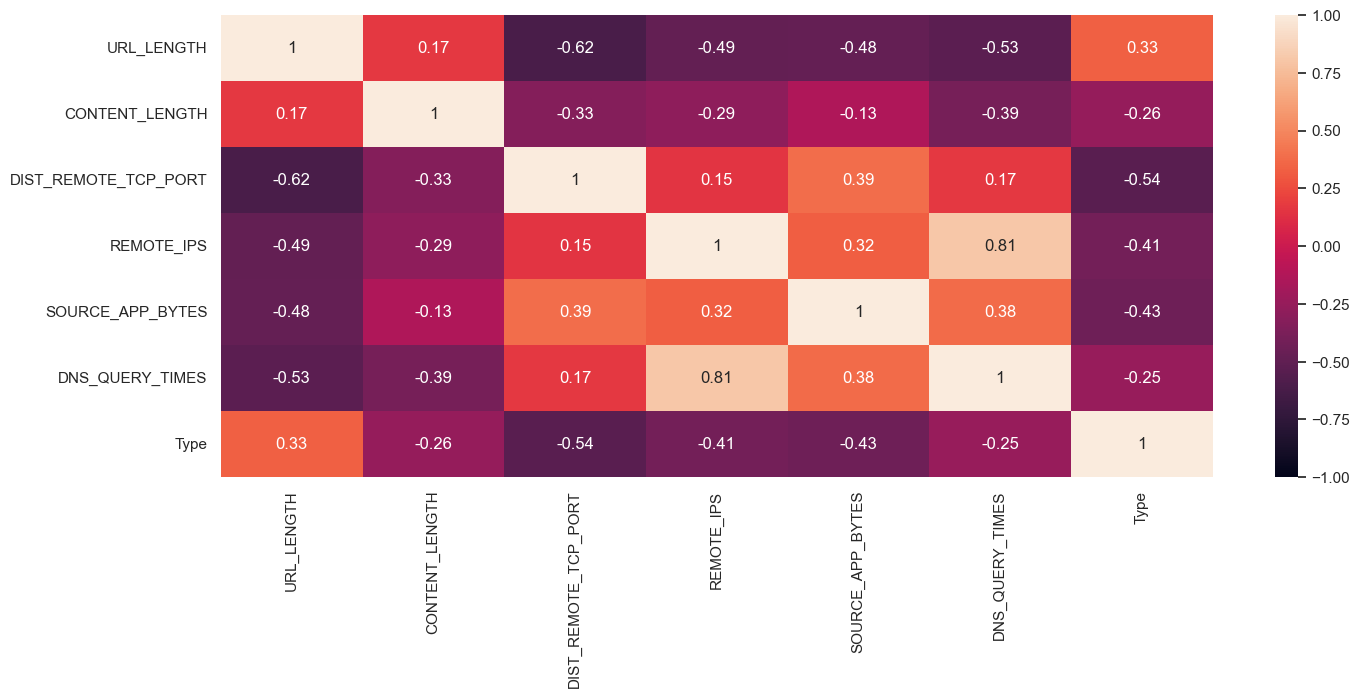

In [7]:
# I will also drop the columns of: 
    # APP_PACKETS, because it shows high collinearity with three features. 
    # APP_BYTES, same reason.
    # REMOTE_APP_PACKETS, same reason.
    # DIST_REMOTE_TCP_PORT
    # REMOTE_APP_BYTES
    # SOURCE_APP_PACKETS

plt.figure(figsize=(16, 6))
sns.heatmap(correlation.drop(columns=["NUMBER_SPECIAL_CHARACTERS", "APP_BYTES", "APP_PACKETS", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS", "REMOTE_APP_BYTES", "TCP_CONVERSATION_EXCHANGE"]).corr(), vmin=-1, vmax=1, annot=True);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [8]:
clean = websites.drop(columns=["NUMBER_SPECIAL_CHARACTERS", "APP_BYTES", "APP_PACKETS", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS", "REMOTE_APP_BYTES", "TCP_CONVERSATION_EXCHANGE"])
clean.head(3)

,URL,URL_LENGTH,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,0,2,1153,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,7,4,1265,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0.0,0


In [9]:
clean.isna().mean()

URL                     0.000000
URL_LENGTH              0.000000
CHARSET                 0.003930
SERVER                  0.098821
CONTENT_LENGTH          0.455924
WHOIS_COUNTRY           0.171814
WHOIS_STATEPRO          0.203257
WHOIS_REGDATE           0.071308
WHOIS_UPDATED_DATE      0.078046
DIST_REMOTE_TCP_PORT    0.000000
REMOTE_IPS              0.000000
SOURCE_APP_BYTES        0.000000
DNS_QUERY_TIMES         0.000561
Type                    0.000000
dtype: float64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [10]:
# WHOIS_STATEPRO has a bit more than 20% of missings
# CONTENT_LENGTH has definitely more than 45% of missings    

In [11]:
clean.drop(columns=["CONTENT_LENGTH", "WHOIS_STATEPRO"], inplace=True)

In [12]:
clean.dropna(inplace=True)

In [13]:
clean.head(2)

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,ISO-8859-1,nginx,US,7/10/1997 4:00,12/09/2013 0:45,22,3,18784,8.0,0
5,B0_2064,18,UTF-8,nginx,SC,3/08/2016 14:30,3/10/2016 3:45,6,9,838,0.0,0


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [14]:
clean.isna().mean()

URL                     0.0
URL_LENGTH              0.0
CHARSET                 0.0
SERVER                  0.0
WHOIS_COUNTRY           0.0
WHOIS_REGDATE           0.0
WHOIS_UPDATED_DATE      0.0
DIST_REMOTE_TCP_PORT    0.0
REMOTE_IPS              0.0
SOURCE_APP_BYTES        0.0
DNS_QUERY_TIMES         0.0
Type                    0.0
dtype: float64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [15]:
clean.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN', 'LU', 'GB',
       "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE', 'SI', 'IL',
       'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES',
       'us', 'KR', 'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'Cyprus', 'BY',
       'AE', 'IE', 'UY', 'KG'], dtype=object)

In [16]:
def same_country(string):
    if string == 'CY' or string == 'Cyprus':
        return 'cy'
    elif string == 'GB' or string == 'United Kingdom' or string == "[u'GB'; u'UK']":
        return 'uk'
    else:
        return string

In [17]:
clean.WHOIS_COUNTRY = clean['WHOIS_COUNTRY'].apply(same_country)

In [18]:
clean["WHOIS_COUNTRY"] = clean.WHOIS_COUNTRY.apply(lambda x : x.upper())

In [19]:
clean.WHOIS_COUNTRY.unique()

array(['US', 'SC', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU', 'FR',
       'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT', 'CZ', 'PH', 'BE',
       'NO', 'TR', 'LV', 'DE', 'ES', 'KR', 'HK', 'UA', 'CH', 'BS', 'PK',
       'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [20]:
clean.WHOIS_COUNTRY.value_counts()


WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     34
UK     32
PA     21
JP     11
CN      9
CZ      9
FR      8
IN      8
CH      6
RU      6
NL      5
KR      4
AT      4
BS      4
PH      4
SE      4
KY      3
HK      3
SC      3
BE      3
TR      3
DE      3
UY      2
CY      2
IL      2
UA      2
SI      2
NO      2
KG      2
UG      1
LU      1
PK      1
IT      1
LV      1
BY      1
AE      1
IE      1
Name: count, dtype: int64

<Axes: xlabel='WHOIS_COUNTRY', ylabel='count'>

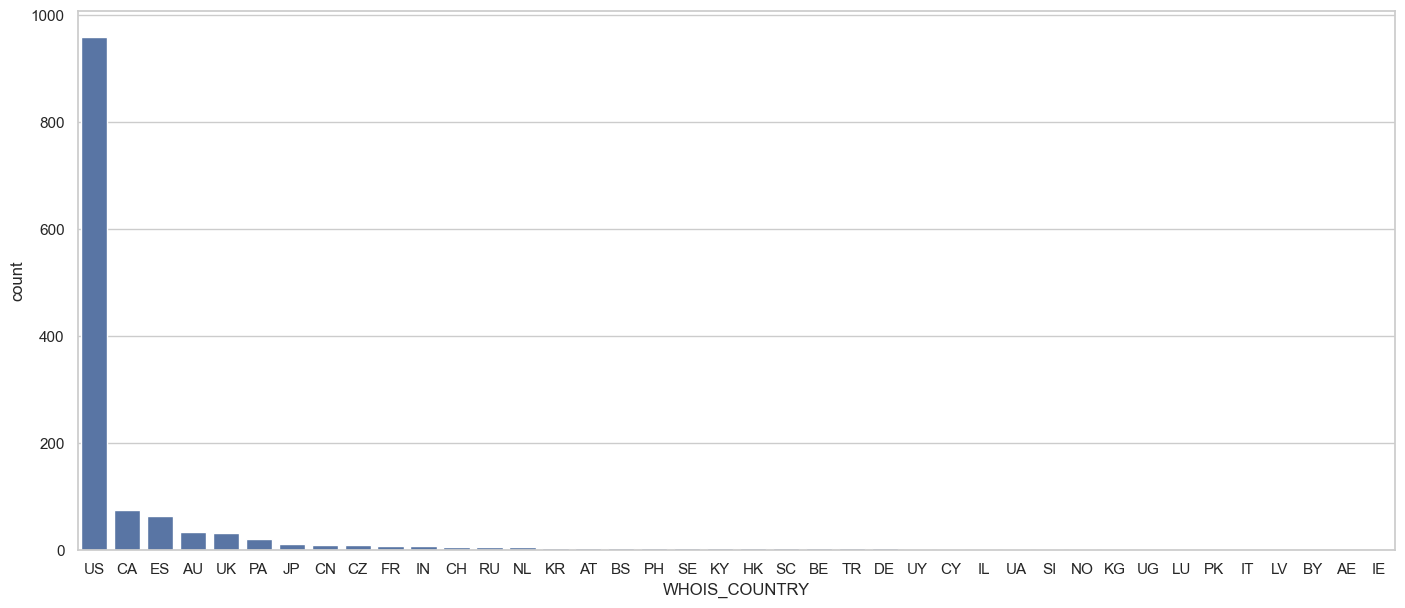

In [21]:
plt.figure(figsize=(17, 7))
sns.barplot(clean.WHOIS_COUNTRY.value_counts())

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [22]:
clean.WHOIS_COUNTRY.value_counts().head(10)

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     34
UK     32
PA     21
JP     11
CN      9
CZ      9
FR      8
Name: count, dtype: int64

In [23]:
keep_columns = ['US', 'CA', 'ES', 'AU', 'UK', 'PA', 'JP', 'CN', 'CZ', 'FR']
clean['WHOIS_COUNTRY'] = clean['WHOIS_COUNTRY'].where(clean['WHOIS_COUNTRY'].isin(keep_columns), 'OTHER')
clean.WHOIS_COUNTRY.unique()

array(['US', 'OTHER', 'UK', 'AU', 'CA', 'PA', 'FR', 'JP', 'CN', 'CZ',
       'ES'], dtype=object)

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [24]:
clean.drop(columns= ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)
clean.sample(2)


,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
1678,B0_935,105,utf-8,Apache,US,0,0,0,0.0,0
388,B0_1365,38,utf-8,nginx/1.1.19,US,0,0,0,0.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [25]:
clean.dtypes


URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
SOURCE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [26]:
clean.drop(columns= 'URL', inplace=True)
clean.sample(1)


,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
1334,68,utf-8,nginx,US,1,4,15998,4.0,0


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [27]:
clean.CHARSET.unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [28]:
clean.SERVER.unique()


array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'openresty', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.10 (Debian)', 'Apache/2.4.6 (CentOS) PHP/5.6.8',
       'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15

In [29]:
clean.SERVER.value_counts().head(20)

SERVER
Apache                                                                                       322
nginx                                                                                        147
Microsoft-HTTPAPI/2.0                                                                         85
cloudflare-nginx                                                                              81
GSE                                                                                           49
Server                                                                                        48
Microsoft-IIS/7.5                                                                             42
YouTubeFrontEnd                                                                               41
nginx/1.12.0                                                                                  31
ATS                                                                                           30
Apache/2.2.15 (CentOS) 

In [30]:
# Apache
# Microsoft
# nginx
# OpenSSL
# GSE
# Tengine
# Server
# YouTube
# ATS

# We could try to classify them with a function, checking if the string contains any of the words above. 
# This way we would reduce the unique values. 

![Think Hard](../think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [31]:
clean.SERVER.value_counts().head(4)

SERVER
Apache                   322
nginx                    147
Microsoft-HTTPAPI/2.0     85
cloudflare-nginx          81
Name: count, dtype: int64

In [32]:
def server_union(string):
    if 'apache' in string.lower():
        return 'Apache'
    elif 'microsoft' in string.lower():
        return 'Microsoft'
    elif 'nginx' in string.lower():
        return 'nginx'
    else:
        return 'Other'


In [33]:
clean.SERVER = clean['SERVER'].apply(server_union)
clean.sample(1)

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
535,40,us-ascii,Microsoft,US,0,2,38477,2.0,0


In [34]:
clean.SERVER.value_counts()


SERVER
Apache       516
nginx        330
Other        307
Microsoft    154
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [35]:
website_dummy = pd.get_dummies(clean, columns= ["CHARSET", "SERVER", "WHOIS_COUNTRY"], drop_first=True)


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [36]:
website_dummy.head(4)


,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
3,17,22,3,18784,8.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
5,18,6,9,838,0.0,0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
6,18,0,3,8559,2.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,19,0,0,0,0.0,0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


In [37]:
website_dummy.dtypes

URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
SOURCE_APP_BYTES          int64
DNS_QUERY_TIMES         float64
Type                      int64
CHARSET_UTF-8              bool
CHARSET_iso-8859-1         bool
CHARSET_us-ascii           bool
CHARSET_utf-8              bool
CHARSET_windows-1251       bool
CHARSET_windows-1252       bool
SERVER_Microsoft           bool
SERVER_Other               bool
SERVER_nginx               bool
WHOIS_COUNTRY_CA           bool
WHOIS_COUNTRY_CN           bool
WHOIS_COUNTRY_CZ           bool
WHOIS_COUNTRY_ES           bool
WHOIS_COUNTRY_FR           bool
WHOIS_COUNTRY_JP           bool
WHOIS_COUNTRY_OTHER        bool
WHOIS_COUNTRY_PA           bool
WHOIS_COUNTRY_UK           bool
WHOIS_COUNTRY_US           bool
dtype: object

In [38]:
website_dummy_2 = pd.get_dummies(clean, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'], drop_first=True, dtype=int)


In [39]:
website_dummy_2.sample(4)

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_FR,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
1609,97,0,2,384,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
911,50,25,9,33677,8.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
663,44,0,0,0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1328,68,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [40]:
X = website_dummy.drop(columns='Type')
y = website_dummy.Type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [41]:
model1 = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [42]:
model1.fit(X_train, y_train)

LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model1.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[233,   2],
       [ 17,  10]])

In [46]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Interpretation
TN, FP, FN, TP = conf_matrix.ravel()

print("Confusion Matrix:")
print(conf_matrix)
print("\nTrue Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

Confusion Matrix:
[[233   2]
 [ 17  10]]

True Negative (TN): 233
False Positive (FP): 2
False Negative (FN): 17
True Positive (TP): 10


In [45]:
accuracy_score(y_test, y_pred)

0.9274809160305344

What are your thoughts on the performance of the model? Write your conclusions below.

In [48]:
accuracy = (TN + TP) / (TN + FP + FN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Printing results
print("Accuracy:", accuracy)
print("Precision (Positive Predictive Value):", precision)
print("Recall (Sensitivity, True Positive Rate):", recall)
print("F1 Score:", f1_score)

Accuracy: 0.9274809160305344
Precision (Positive Predictive Value): 0.8333333333333334
Recall (Sensitivity, True Positive Rate): 0.37037037037037035
F1 Score: 0.5128205128205128


In [50]:
# The model is correct approximately 92.7% of the time on the test data.
# When the model predicts positive, it is correct approximately 83.3% of the time.
# But the model is able to identify only 37.0% of all positive samples.
# The F1 score is approximately 51.3%.
# While accuracy is high, the low recall suggests that the model is not capturing a significant portion of the positive samples.

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [51]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=3)

In [52]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [59]:
# Compute predicted probabilities
y_prob = model2.predict_proba(X_test)[:, 1]

# Classify instances based on a threshold of 0.5
y_pred_2 = (y_prob > 0.5).astype(int)

# Print confusion matrix
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:")
print(conf_matrix_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_2)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[235   0]
 [ 15  12]]

Accuracy Score: 0.9427480916030534


In [60]:
# Interpretation
TN, FP, FN, TP = conf_matrix_2.ravel()

print("Confusion Matrix:")
print(conf_matrix_2)
print("\nTrue Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

Confusion Matrix:
[[235   0]
 [ 15  12]]

True Negative (TN): 235
False Positive (FP): 0
False Negative (FN): 15
True Positive (TP): 12


In [61]:
accuracy = (TN + TP) / (TN + FP + FN + TP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Printing results
print("Accuracy:", accuracy)
print("Precision (Positive Predictive Value):", precision)
print("Recall (Sensitivity, True Positive Rate):", recall)
print("F1 Score:", f1_score)

Accuracy: 0.9427480916030534
Precision (Positive Predictive Value): 1.0
Recall (Sensitivity, True Positive Rate): 0.4444444444444444
F1 Score: 0.6153846153846153


In [ ]:
# This model is clearly better than the previous one. 

#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [65]:
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train, y_train)
y_pred_3 = model3.predict(X_test)
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
print("Confusion matrix:")
conf_matrix_3

Confusion matrix:


array([[235,   0],
       [ 15,  12]])

In [66]:
print("Accuracy score")
accuracy_score(y_test, y_pred_3)

Accuracy score


0.9427480916030534

Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [68]:
# No, both the confusion matrix and the accuracy score have stayed the same. 
# I guess it is beacuse in the model where we applied the max_depth=3 we added the threshold of 0.5, meaning that all values with a probability of 50% or higher are considered as trues, and this improves our recall. 
# I think my results would have been better if I hadn't dropped so much data in the challenge 2. 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [69]:
from sklearn.preprocessing import RobustScaler

In [72]:
scale = RobustScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [73]:
model4 = LogisticRegression()

In [74]:
model4.fit(X_train_scaled, y_train)

LogisticRegression()

In [75]:
y_pred_scaled = model4.predict(X_test_scaled)

In [76]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy Score with RobustScaler:", accuracy_scaled)

Accuracy Score with RobustScaler: 0.9312977099236641


In [ ]:
# If we compare it with the first model (model1) the accuracy score has improved.
# Even though with the Decision Tree Classifier models the accuracy was better. 